In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("uber (2).csv")

In [3]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [4]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [5]:
df=df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [7]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [8]:
df.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [17]:
df=df.assign(hour=df.pickup_datetime.dt.hour,
            month=df.pickup_datetime.dt.month,
            day=df.pickup_datetime.dt.day,
            year=df.pickup_datetime.dt.year,
            dayofweek=df.pickup_datetime.dt.dayofweek)

In [18]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3


In [19]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dtype: int64

In [21]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(),inplace=True)
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(),inplace=True)


In [22]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dtype: int64

In [29]:
df=df.drop('pickup_datetime',axis=1)

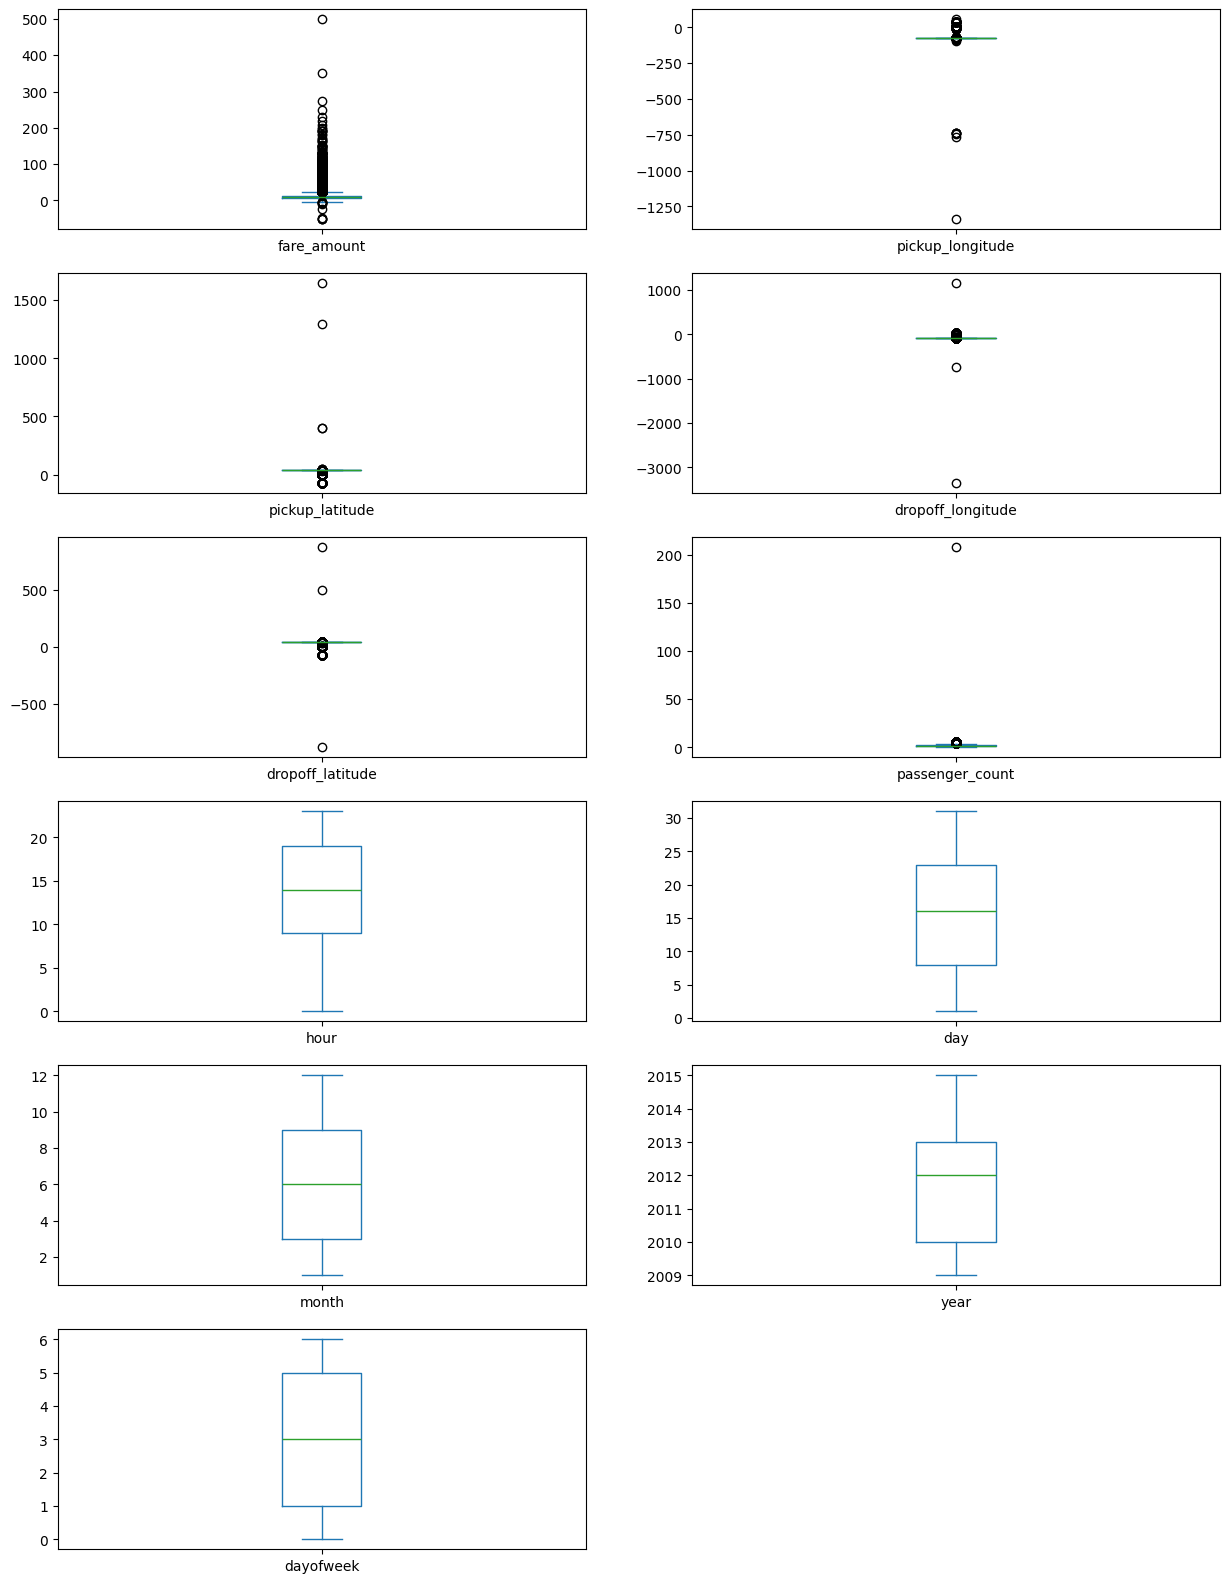

In [35]:
import matplotlib.pyplot as pt
df.plot(kind="box",subplots=True,layout=(6,2),figsize=(15,20))
plt.show()

In [62]:
from math import *
def distance_travel(longitude1,latitude1,longitude2,latitude2):
    travel_dis=[]
    for pos in range(len(longitude1)):
        lan_1,log_1,lan_2,log_2=map(radians,[latitude1[pos],longitude1[pos],latitude2[pos],longitude2[pos]])
        dis_lon=log_2-log_1
        dis_lat=lan_2-lan_1
        a=sin(dis_lat/2)**2+cos(lan_1)*cos(lan_2)*sin(dis_lon/2)**2
        d=2*asin(sqrt(a))*6371
        travel_dis.append(d)
    return travel_dis    



In [63]:
df['dist_travel_km'] = distance_travel(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(), df.dropoff_latitude.to_numpy())
#df['distance_travel']=distance_travel(df.pickup_longitude.to_numpy(),df.dropoff_longitude.to_numpy(),df.pickup_latitude.to_numpy(),df.dropoff_latitude.to_numpy())

In [64]:
df.columns

Index(['key', 'fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'hour',
       'day', 'month', 'year', 'dayofweek', 'dist_travel_km'],
      dtype='object')

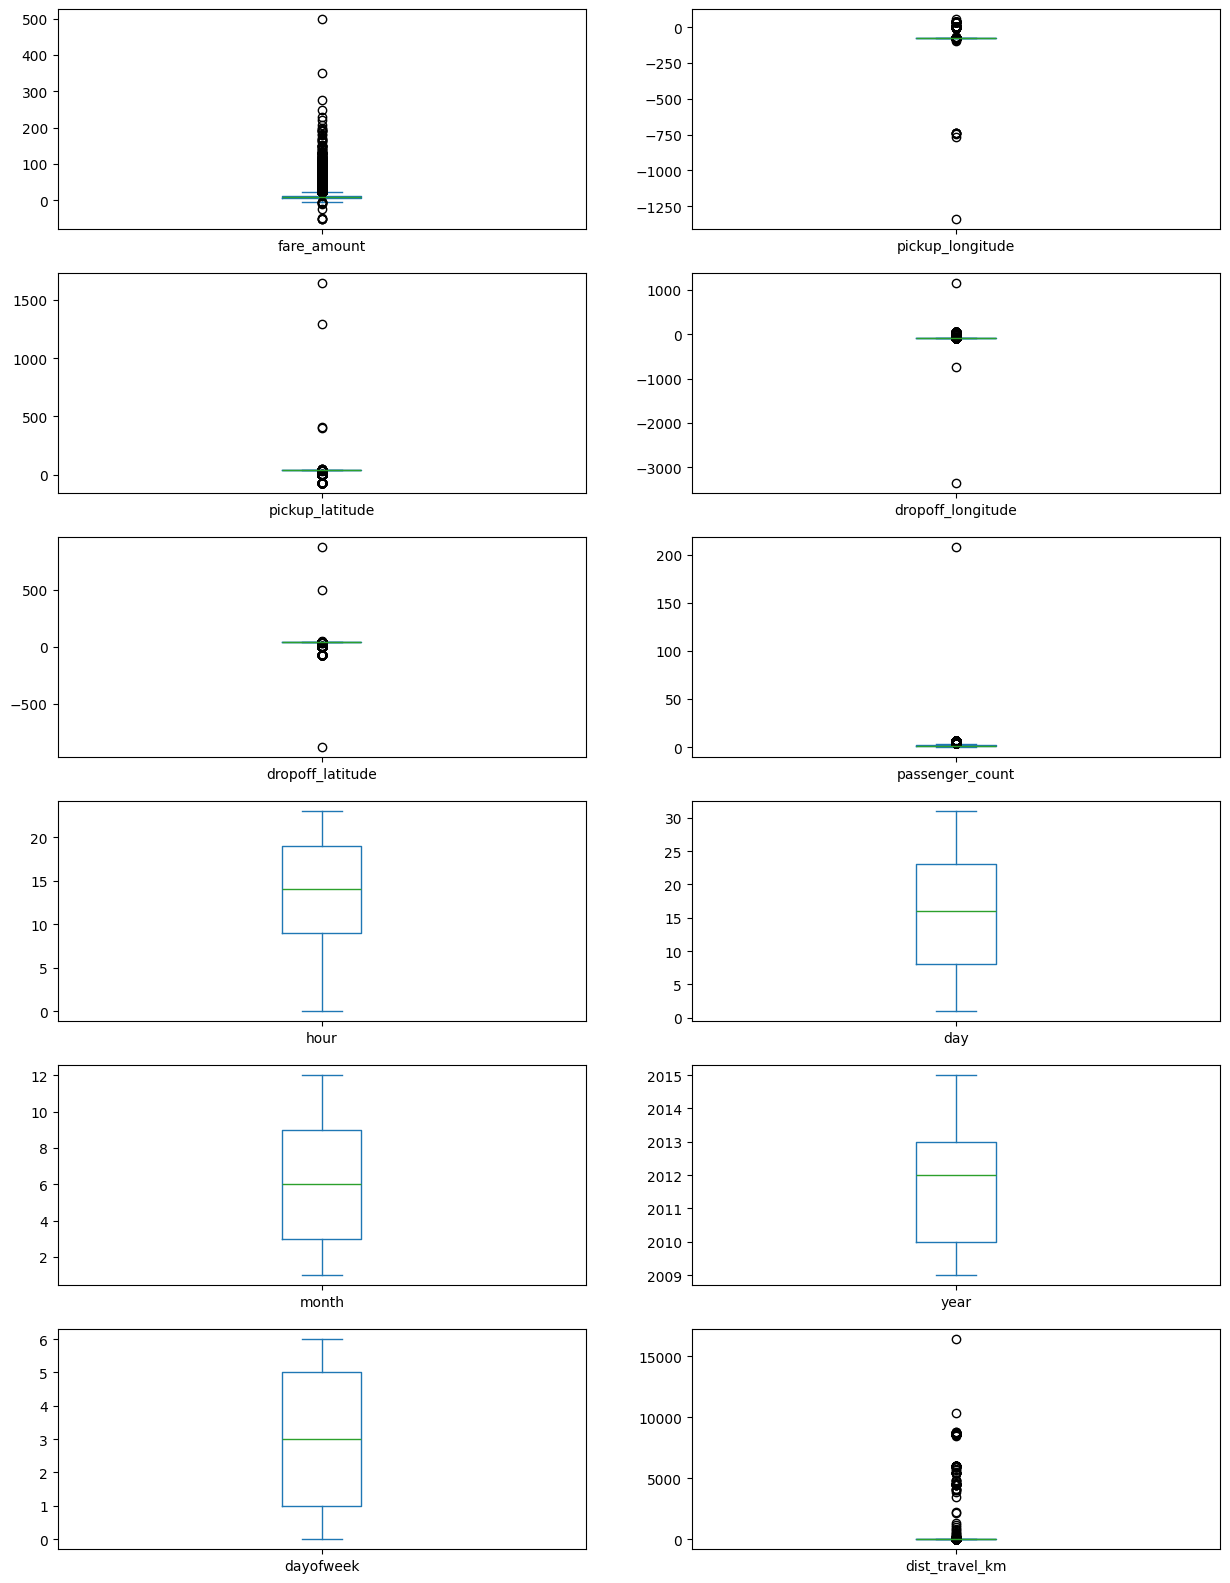

In [69]:
df.plot(kind="box",subplots=True,layout=(6,2),figsize=(15,20))
plt.show()

In [70]:
df=df.drop('key',axis=1)


In [71]:
col_list=list(df.columns)

In [73]:
def remove_o(df1,col):
    Q1=df1[col].quantile(0.25)
    Q3=df1[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    df1[col]=np.clip(df1[col],lower,upper)
    return df1
for i in col_list:
    df=remove_o(df,i)

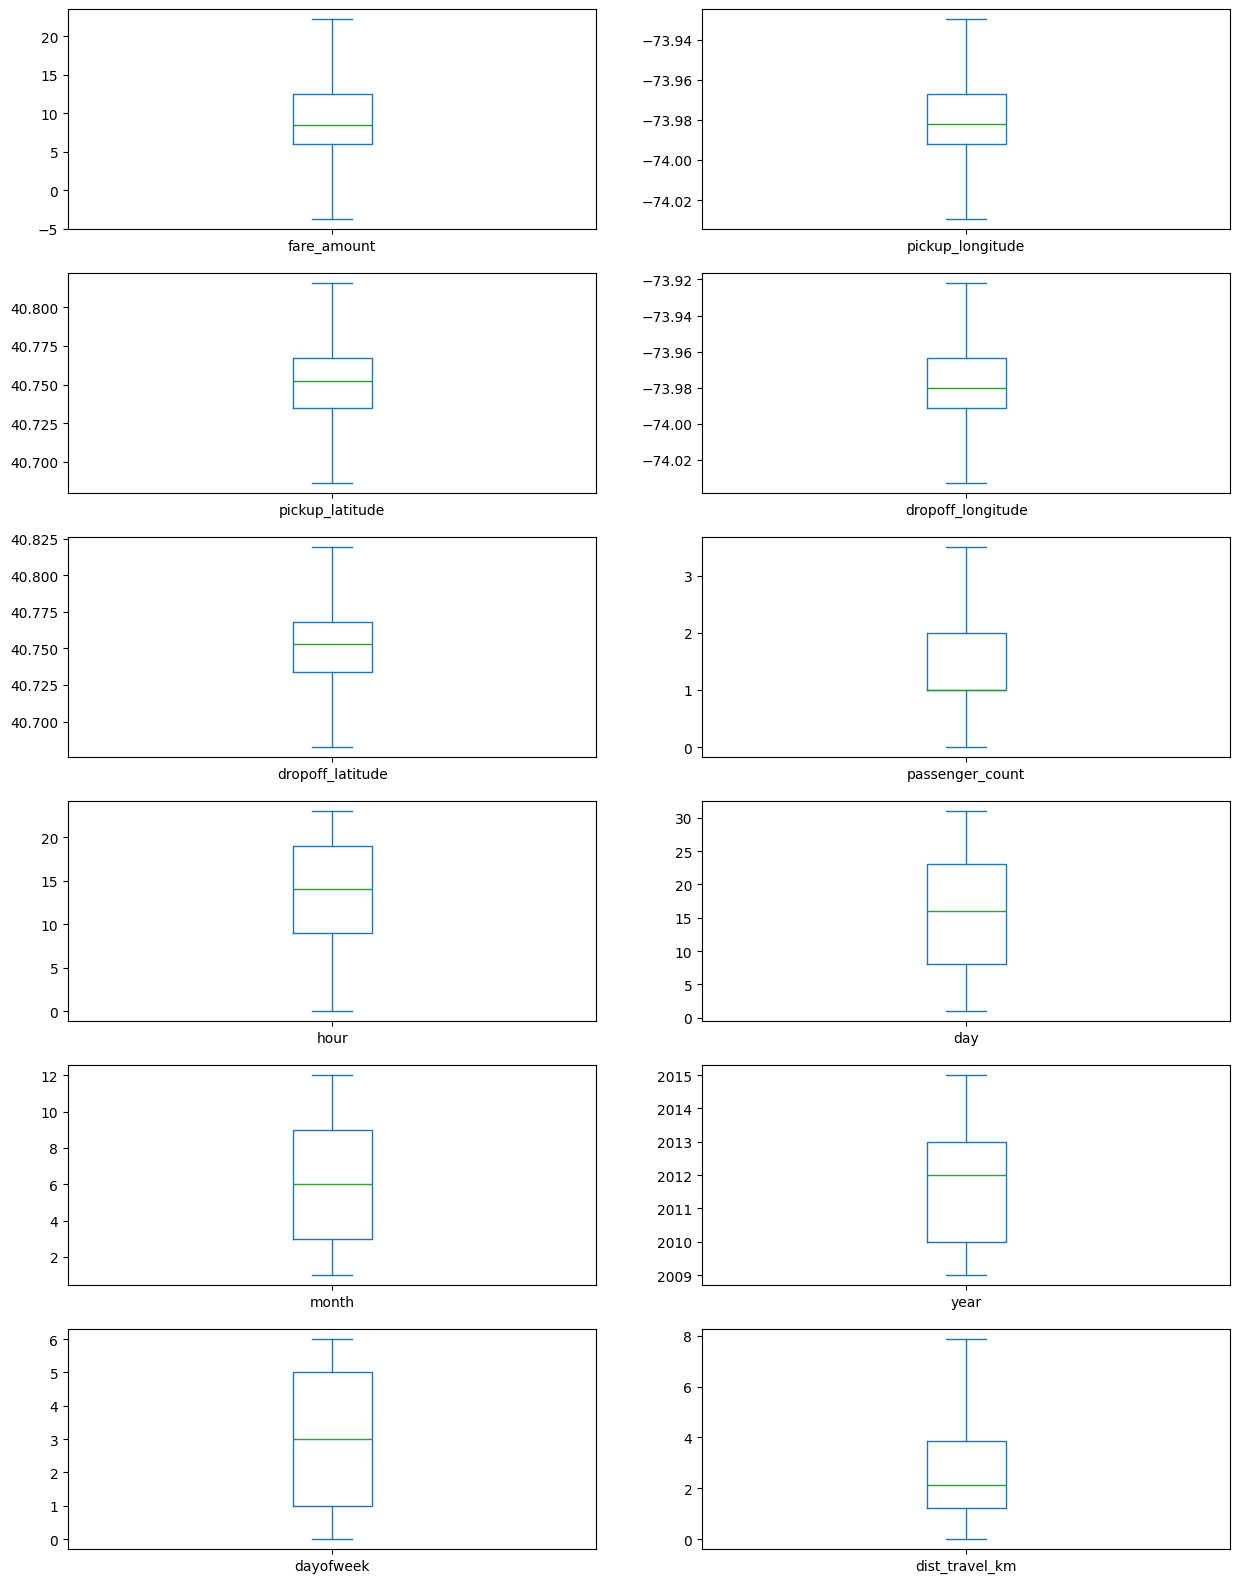

In [74]:
df.plot(kind="box",subplots=True,layout=(6,2),figsize=(15,20))
plt.show()

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df.columns
x=df



In [92]:
df2=pd.read_csv("uber (2).csv")
y=df2['fare_amount']
y

0          7.5
1          7.7
2         12.9
3          5.3
4         16.0
          ... 
199995     3.0
199996     7.5
199997    30.9
199998    14.5
199999    14.1
Name: fare_amount, Length: 200000, dtype: float64

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.25)

In [93]:
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_pred


array([ 5.28726854,  2.91077571, 10.50528257, ...,  5.89526316,
       13.20047538,  9.90896933])

In [94]:
y_test

49673      4.0
171551     6.1
5506       8.5
38370      4.9
36930      6.5
          ... 
65867     10.0
198829     5.0
90010      8.9
112248     8.5
55029     10.5
Name: fare_amount, Length: 50000, dtype: float64

In [95]:
cols = ['Model', 'RMSE', 'R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

In [96]:
from sklearn import metrics 
from sklearn.metrics import r2_score 

reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
reg_squared = r2_score(y_test, y_pred)

full_metrics = pd.Series({'Model': "Linear Regression", 'RMSE' : reg_RMSE, 'R-Squared' : reg_squared})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
#result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

# print the result table
print(full_metrics)

Model        Linear Regression
RMSE                  6.608588
R-Squared             0.559033
dtype: object


In [97]:
from sklearn.ensemble import RandomForestRegressor
rof=RandomForestRegressor()
rof.fit(x_train,y_train)

RandomForestRegressor()

In [98]:
y_pred=rof.predict(x_test)

In [99]:
reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
reg_squared = r2_score(y_test, y_pred)

full_metrics = pd.Series({'Model': "Linear Regression", 'RMSE' : reg_RMSE, 'R-Squared' : reg_squared})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
#result_tabulation = result_tabulation.append(full_metrics, ignore_index = True)

# print the result table
print(full_metrics)

Model        Linear Regression
RMSE                  4.983003
R-Squared              0.74929
dtype: object
